   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Missing Values in Dataset:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg  

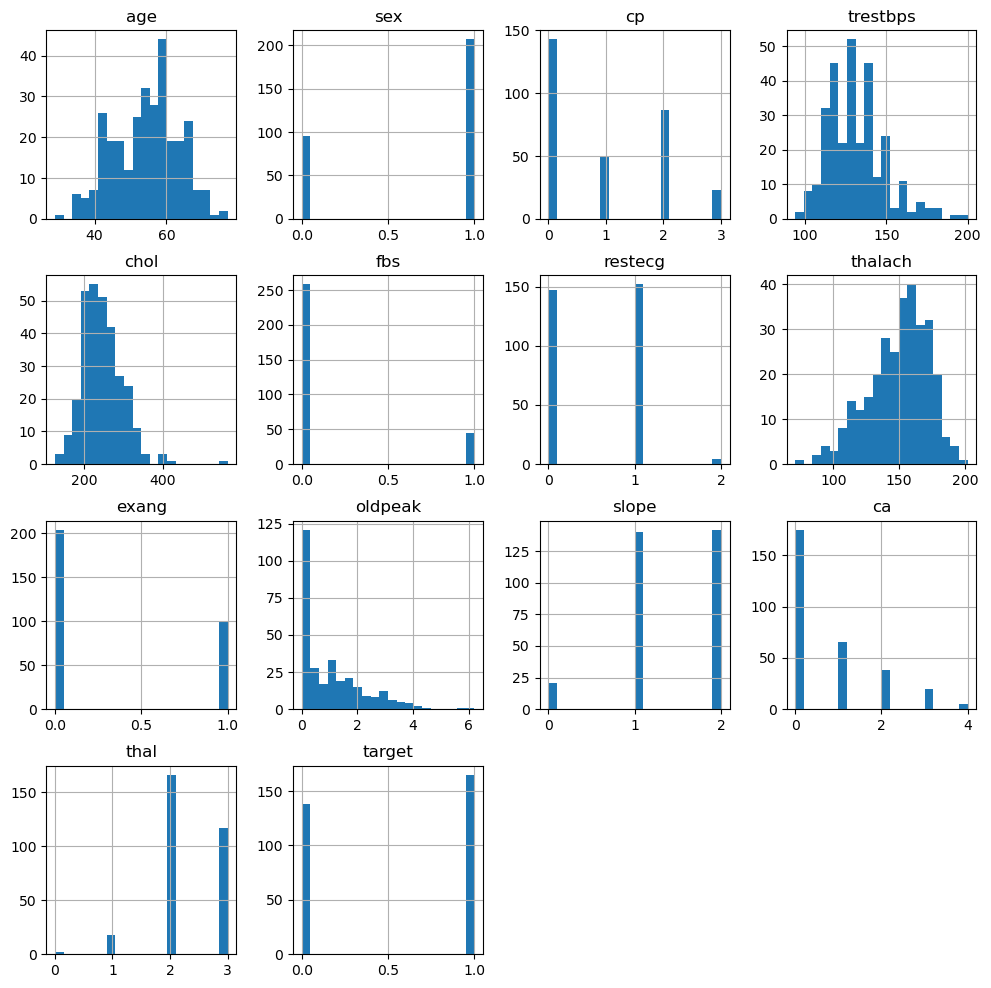

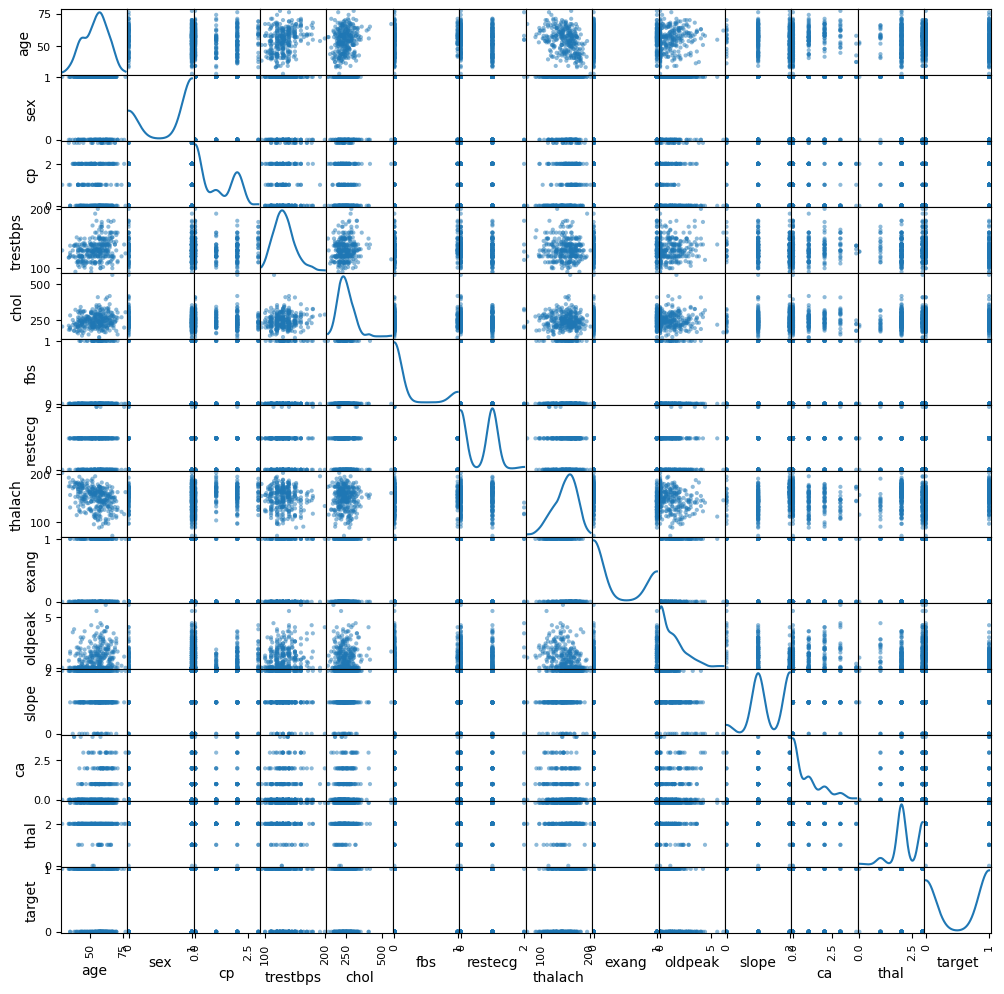

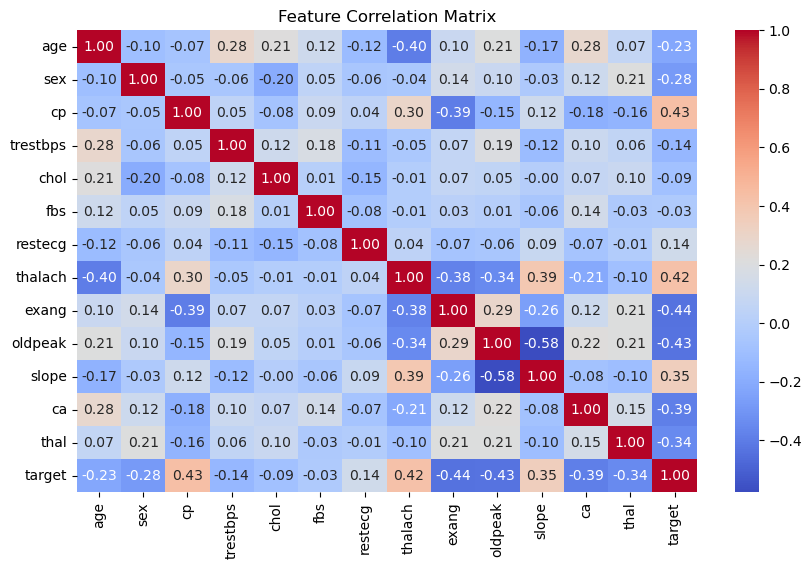

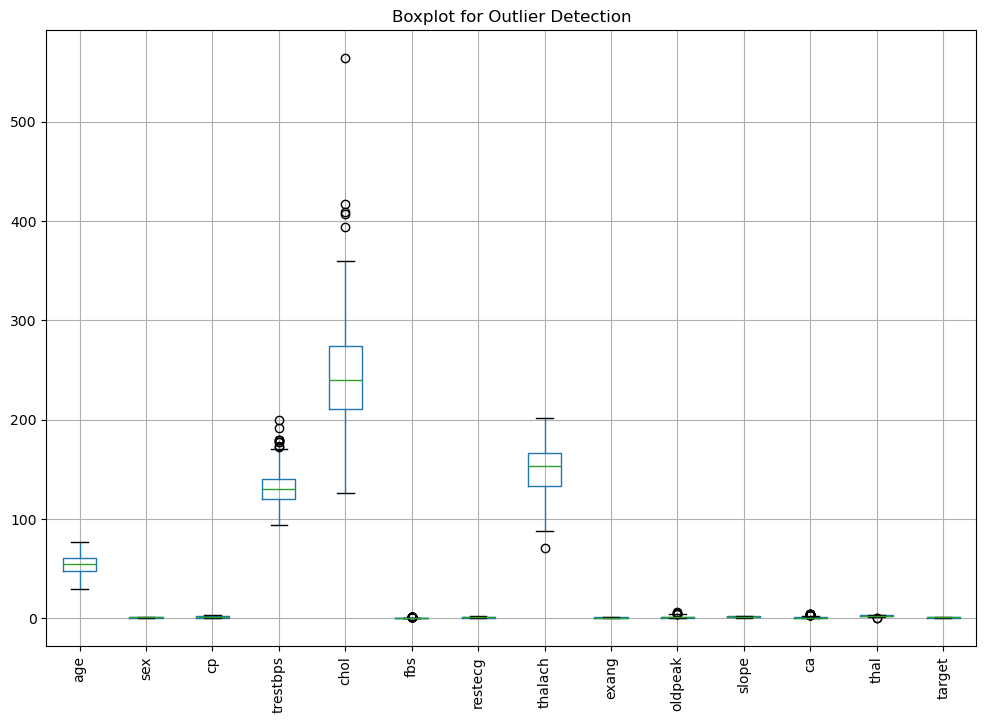


Original Data Shape: (303, 14)
Cleaned Data Shape: (228, 14)

Train Set Shape: (193, 13) (193,)
Test Set Shape: (35, 13) (35,)

🔹 Logistic Regression:
Accuracy: 0.7714, ROC AUC: 0.7647

🔹 Support Vector Machine:
Accuracy: 0.8000, ROC AUC: 0.7941


C:\Users\VENKATSAI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Random Forest Classifier:
Accuracy: 0.8000, ROC AUC: 0.7941

🔹 K-Nearest Neighbors:
Accuracy: 0.5714, ROC AUC: 0.5637

🔹 Gradient Boosting:
Accuracy: 0.8000, ROC AUC: 0.7958

🔹 Naive Bayes:
Accuracy: 0.7429, ROC AUC: 0.7369

🔹 Model Performance Comparison:

                     Accuracy   ROC AUC
Logistic Regression  0.771429  0.764706
SVM                  0.800000  0.794118
Random Forest        0.800000  0.794118
KNN                  0.571429  0.563725
Gradient Boosting    0.800000  0.795752
Naive Bayes          0.742857  0.736928


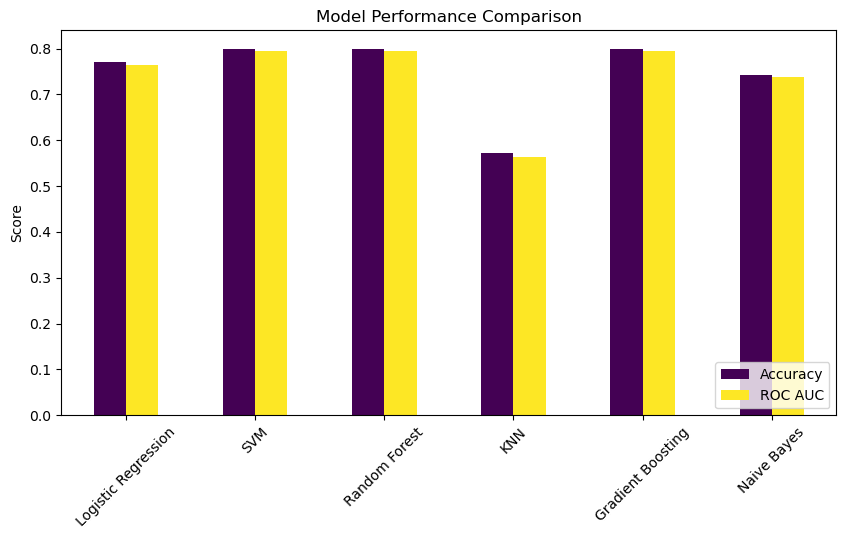

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Update the path as per your syst
data = pd.read_csv(r"C:\Users\VENKATSAI\Downloads\Heart-Disease-Detection-master\Heart-Disease-Detection-master\heart.csv")


# Display first few rows
print(data.head())

# Check for missing values
print("\nMissing Values in Dataset:\n", data.isnull().sum())

# Data types
print("\nData Types:\n", data.dtypes)

# Statistical summary
print("\nDataset Summary:\n", data.describe())

# -------------------- Exploratory Data Analysis --------------------

# Histogram of all features
data.hist(bins=20, figsize=(12, 12))
plt.show()

# Scatter matrix
pd.plotting.scatter_matrix(data, figsize=(12, 12), diagonal='kde')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# -------------------- Outlier Detection & Removal --------------------

# Boxplots for detecting outliers
plt.figure(figsize=(12, 8))
data.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Interquartile Range (IQR) Method to remove outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nOriginal Data Shape:", data.shape)
print("Cleaned Data Shape:", data_cleaned.shape)

# -------------------- Model Training & Evaluation --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Split features and target variable
X = data_cleaned.drop(columns=['target'])
y = data_cleaned['target']

# Train-test split (15% test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print("\nTrain Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

# Model Dictionary to Store Results
model_results = {}

# -------------------- 1️⃣ Logistic Regression --------------------
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

model_results['Logistic Regression'] = (accuracy, roc_auc)

print("\n🔹 Logistic Regression:")
print(f"Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

# -------------------- 2️⃣ Support Vector Machine (SVM) --------------------
from sklearn.svm import SVC

clf = SVC(kernel='linear', gamma='scale')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

model_results['SVM'] = (accuracy, roc_auc)

print("\n🔹 Support Vector Machine:")
print(f"Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

# -------------------- 3️⃣ Random Forest Classifier --------------------
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=60)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

model_results['Random Forest'] = (accuracy, roc_auc)

print("\n🔹 Random Forest Classifier:")
print(f"Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

# -------------------- 4️⃣ K-Nearest Neighbors (KNN) --------------------
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

model_results['KNN'] = (accuracy, roc_auc)

print("\n🔹 K-Nearest Neighbors:")
print(f"Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

# -------------------- 5️⃣ Gradient Boosting Classifier --------------------
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

model_results['Gradient Boosting'] = (accuracy, roc_auc)

print("\n🔹 Gradient Boosting:")
print(f"Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

# -------------------- 6️⃣ Naive Bayes --------------------
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

model_results['Naive Bayes'] = (accuracy, roc_auc)

print("\n🔹 Naive Bayes:")
print(f"Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

# -------------------- Model Comparison --------------------

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(model_results, index=['Accuracy', 'ROC AUC']).T
print("\n🔹 Model Performance Comparison:\n")
print(results_df)

# Bar plot for model comparison
results_df.plot(kind='bar', figsize=(10, 5), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()
